###  1.1 Download the dataset

In [1]:
#Dataset downloaded and loaded..
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv("Placement_Data_Full_Class.csv")

In [2]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
# sl_no column is not much useful and it may make unnecessary noise so dropping it..
dataset.drop('sl_no', inplace=True, axis=1)

In [4]:
dataset.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

### 1.2 Replace the NaN values with correct value. And justify why you have chosen the same.

In [5]:
# Finding how many null values are there in the dataset
dataset.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
# Totally 67 Null values are there in salary column in the dataset

In [7]:
dataset[dataset['salary'].isnull()]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


In [8]:
dataset[dataset['salary'].isnull()]['status'].unique()

array(['Not Placed'], dtype=object)

In [9]:
# Looks if status is NotPlaced then corresponding salary column is Null
# So filling the Null with 0, considering the candidate is not placed

In [10]:
dataset['salary'].fillna(0,inplace=True)

In [11]:
dataset.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [12]:
# Now dataset is clean

### 1.3 How many of them are not placed

In [13]:
not_placed=(dataset['status']=='Not Placed').sum()
placed=(dataset['status']=='Placed').sum()

In [14]:
print("There are %d candidates not placed" % (not_placed))

There are 67 candidates not placed


### 1.4 Find the reason for non placement from the dataset?

In [15]:
dataset.groupby('status')[['ssc_p','hsc_p','degree_p','etest_p','mba_p']].mean()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
status,,,,,
Not Placed,57.544030,58.395522,61.134179,69.587910,61.612836
Placed,71.721486,69.926554,68.740541,73.238041,62.579392


In [16]:
# Above table shows Placed and Non-Placed candidates Grade-wise
# In SSC average 57% scored candidates are not Placed
# In HSC average 58% scored candidates are not Placed
# In Deg average 61% scored candidates are not Placed
# In E-Test average 69% scored candidates are not Placed
# In MBA average 61% scored candidates are not placed

### 1.5 What kind of relation between salary and mba_p

In [17]:
dataset.corr(numeric_only=True)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [18]:
# Correlation between salary and mba_passmark is 13%
# It is positive correlation
# Salary and MBA_Passmark is directly Proportional
# So that If Increase in MBA_Passmark then Salary also get increase with 13%

### 1.6 Which specialization is getting minimum salary?

For this, we are separating the details of Placed candidates, because Non-Placed candidates have a salary of 0, which would otherwise show 0 as the minimum salary.

In [19]:
dataset[dataset["status"]=="Placed"].groupby("specialisation")['salary'].min()

specialisation
Mkt&Fin    200000.0
Mkt&HR     200000.0
Name: salary, dtype: float64

In [20]:
# dataset["status"]=="Placed" ----> Select the Boolean table where status is only "Placed"
# dataset[dataset["status"]=="Placed"] ----> It will give all the rows where status is "Placed"
# .groupby("specialisation") ----> It will group the filter table as per "specialisation" column values
# Ex: Mkt&Fin & Mkt&HR
# dataset[dataset["status"]=="Placed"].groupby("specialisation")['salary'] ----> It will consider only the salary column values
# .min() ----> This will give the minimum value in the salary column
# Overall,
# Filtering out the "Placed" candidates, grouping as per "specialisation" column, considering the "salary" and picking the "minimum"
# from that

In [21]:
# Additionally trying a simple graph for min, max and mean salary

In [22]:
stats = dataset[dataset["status"]=="Placed"].groupby("specialisation")['salary'].agg(['min','max','mean'])

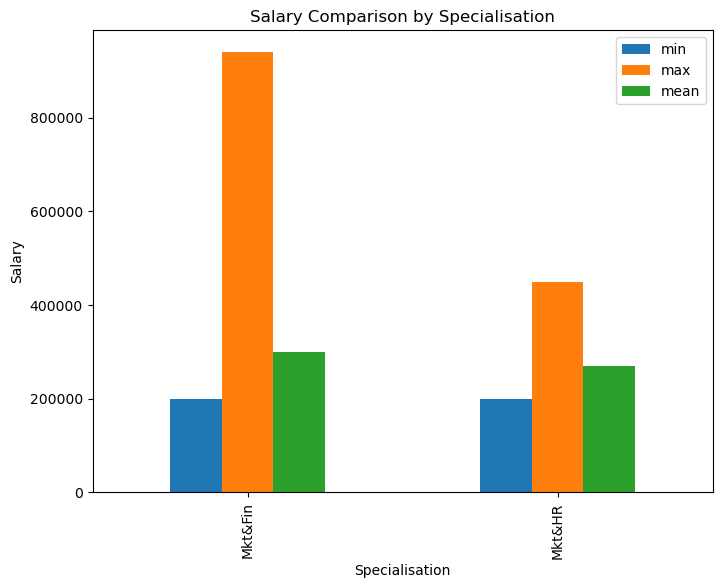

In [23]:
import matplotlib.pyplot as plt
stats.plot(kind='bar', figsize=(8,6))
plt.title("Salary Comparison by Specialisation")
plt.ylabel("Salary")
plt.xlabel("Specialisation")
plt.show()

### 1.7 How many of them getting above 500000 salary?

In [24]:
dataset[dataset['salary']>500000]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,M,60.8,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
150,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
177,F,73.0,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0


In [25]:
cnt=dataset[dataset['salary']>500000].shape[0]

In [26]:
print("There are %d candidates getting above 5 lakhs salary" % cnt)

There are 3 candidates getting above 5 lakhs salary


### 1.8 Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.. (Make decision using Hypothesis Testing)

In [27]:
# It is a One-way classification
# Null Hypothesis (H0) = There is no significant difference between etest_p and mba_p columns [mean's both are eaual]
# Alternate Hypothesis (H1) = There are significant difference between etest_p and mba_p columns [mean's not equal]

In [28]:
from scipy import stats

In [29]:
stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

In [30]:
# p-value is 4.67
# If p-value is < 0.05 then we can reject (H0)
# Here p-values is 4.67 which is greater than 0.05 so we can accept the Null Hypothesis
# There is no significant difference between etest_p and mba_p columns

### 1.9 Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)

In [31]:
# Similarity means we need to go for T-Test and its Un-Paired because Different Group with same condition
# H0 = There is no similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary level of 5%
# H1 = There are similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary level of 5%

In [32]:
dataset['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [33]:
deg_t=dataset[dataset['degree_t'] == 'Sci&Tech']['salary']

In [34]:
dataset['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [35]:
spe=dataset[dataset['specialisation']=='Mkt&HR']['salary']

In [36]:
from scipy.stats import ttest_ind

deg_t=dataset[dataset['degree_t'] == 'Sci&Tech']['salary']
spe=dataset[dataset['specialisation']=='Mkt&HR']['salary']
ttest_ind(deg_t,spe)

TtestResult(statistic=2.692041243555374, pvalue=0.007897969943471179, df=152.0)

In [37]:
# p-value is 0.0078
# if p-value is < 0.05 then we can reject H0
# So here, we are rejecting the Null Hypothesis
# Accepting Alternate Hypothesis : There are similarity between 
# the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary level of 5%

### 1.10 Convert the normal distribution to standard normal distribution for salary column

In [38]:
# For this we need to find the Z-Score
# Z-Score = (X-mean(X))/standard-deviation(X)
# Here, Z-Score = (dataset['salary']-salary_mean)/salary_std

In [39]:
dataset['salary'].head(5)

0    270000.0
1    200000.0
2    250000.0
3         0.0
4    425000.0
Name: salary, dtype: float64

In [40]:
sal_mean=dataset['salary'].mean() 
sal_std=dataset['salary'].std()
salary_std=(dataset['salary']-sal_mean)/sal_std

In [41]:
salary_std.head(5)

0    0.460636
1    0.008384
2    0.331421
3   -1.283765
4    1.462051
Name: salary, dtype: float64

### 1.11 What is the probability Density Function of the salary range from 700000 to 900000?

In [42]:
# Below function plots the dataset with pointing start and end range
# Calculating the Mean and Standard Deviation
# Defining the Normal Distribution with the dataset's mean and standard-deviation
# Calculating the Cumulative Distribution Function for start and end point range.
# Difference b/w CDF of EndPoint and the CDF of Startpoint will give the required probability.


In [43]:
def get_pdf(dataset,start,end):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import norm
    
    sns.histplot(dataset, kde=True, line_kws={'color':'blue'}, color='green')
    plt.axvline(start, color='red')
    plt.axvline(end, color='red')
    
    # Calculate parameters
    sample_mean = dataset.mean()
    sample_std = dataset.std()
    print('Mean=%.3f Standard Deviation=%.3f' % (sample_mean, sample_std))
    
    # Define the distribution
    dist = norm(sample_mean, sample_std)
    
    # Probability between start and end using CDF
    prob = (dist.cdf(end) - dist.cdf(start)) 
    
    print("Probability between range({}, {}): {:.2f}".format(start, end, prob))
    
    return prob

Mean=198702.326 Standard Deviation=154780.927
Probability between range(700000, 900000): 0.00


0.0005973243061798694

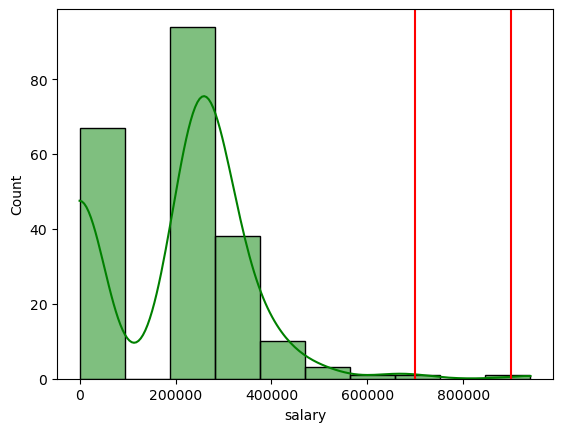

In [44]:
get_pdf(dataset['salary'],700000,900000)

In [45]:
# There is no data between 700000 to 900000 so probability is less than 1% (0.000597)

### 1.12 Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

In [46]:
# Null Hypothesis (H0) - There is no similarity between etest_p and mba_p for Sci&Tech(degree_t) specialisation.
# Alternate Hypothesis (H1) = There are similarity between etest_p and mba_p for Sci&Tech(degree_t) specialisation.
# Paired t-test

In [47]:
from scipy.stats import ttest_ind

etest=dataset[dataset['degree_t'] == 'Sci&Tech']['etest_p']
mba=dataset[dataset['degree_t'] == 'Sci&Tech']['mba_p']

ttest_ind(etest,mba)

TtestResult(statistic=4.532000225151251, pvalue=1.4289217003775636e-05, df=116.0)

In [48]:
# p-value = 1.4289
# If p-value is < 0.05 then we can reject Null Hypothesis
# Here p-value is > 0.05 so we are accepting Null Hypothesis
# H0 - There is no similarity between etest_p and mba_p for Sci&Tech(degree_t) specialisation.

### 1.13 Which parameter is highly correlated with salary?

In [49]:
corr_matrix=dataset.corr(numeric_only=True)

In [50]:
corr_matrix

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [51]:
corr_matrix.index # Giving the Rows

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')

In [52]:
corr_matrix.columns # Giving Column names

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')

In [53]:
for name in corr_matrix.index:
    corr_per = (corr_matrix['salary'][name]) * 100
    print("Salary is %.2f%% correlated with %s" % (corr_per, name))

Salary is 53.81% correlated with ssc_p
Salary is 45.26% correlated with hsc_p
Salary is 40.84% correlated with degree_p
Salary is 18.70% correlated with etest_p
Salary is 13.98% correlated with mba_p
Salary is 100.00% correlated with salary


In [54]:
# SSC_P is highly correlated with Salary, its 53.81%

### 1.14 plot any useful graph and explain it.

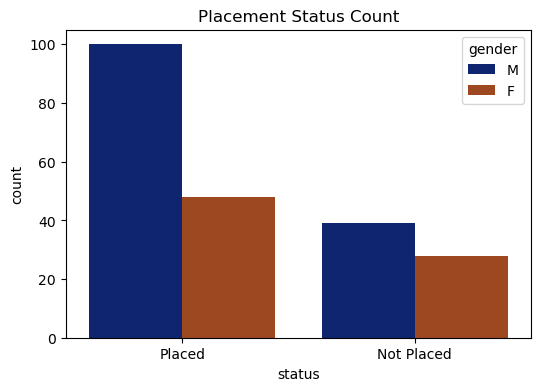

In [55]:
# Plot 1: Placement status countplot
plt.figure(figsize=(6,4))
sns.countplot(x='status', data=dataset, palette='dark', hue='gender')
plt.title("Placement Status Count")
plt.show()

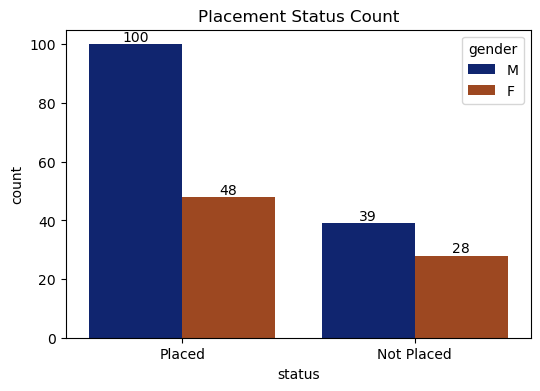

In [56]:
# Plot 2: Placement status countplot with count
plt.figure(figsize=(6,4))
ax = sns.countplot(x='status', data=dataset, palette='dark', hue='gender')
plt.title("Placement Status Count")

# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

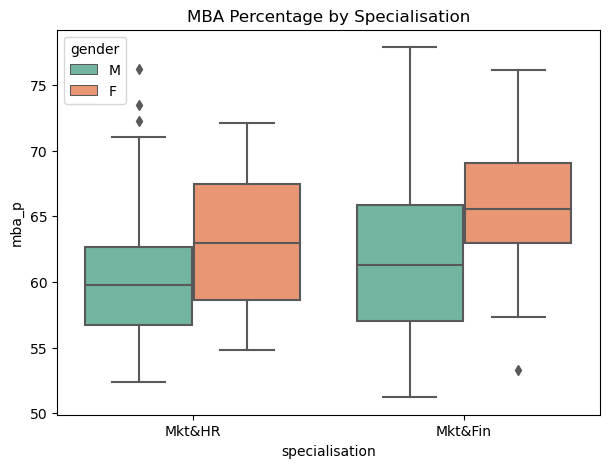

In [57]:
# Plot 3: MBA percentage by specialisation
plt.figure(figsize=(7,5))
sns.boxplot(x='specialisation', y='mba_p', data=dataset, palette='Set2', hue='gender')
plt.title("MBA Percentage by Specialisation")
plt.show()

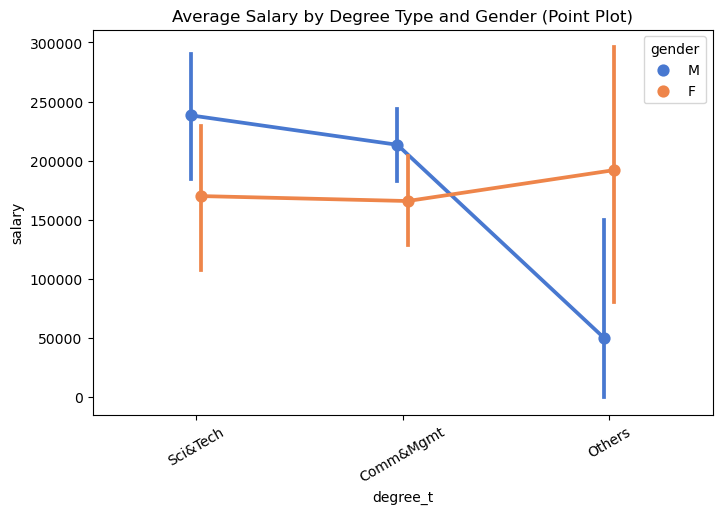

In [58]:
# Plot 4: Pointplot to show Average salary by degree type
plt.figure(figsize=(8,5))
sns.pointplot(x='degree_t', y='salary', data=dataset, hue='gender', palette='muted', dodge=True)
plt.title("Average Salary by Degree Type and Gender (Point Plot)")
plt.xticks(rotation=30)
plt.show()
